# Data Visualisation & Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import joblib
# Load data from the provided link
url = 'https://drive.google.com/uc?export=download&id=1BvQRvWXdbpXpOaSahEMovATmKQuQilQa'

In [2]:
df = pd.read_csv(url)

# Convert Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

Missing values before preprocessing:
Datetime    0
SMA         0
dtype: int64


In [3]:
# Feature Engineering: Extract datetime features
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['DayOfMonth'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month

In [4]:
# Example: Lag features (for illustration)
df['SMA_Lag1'] = df['SMA'].shift(1)
df['SMA_Lag7'] = df['SMA'].shift(7)

In [5]:
# Check stationarity of SMA using Augmented Dickey-Fuller test
result = adfuller(df['SMA'])
print('\nADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -0.876160923378299
p-value: 0.795721573303577


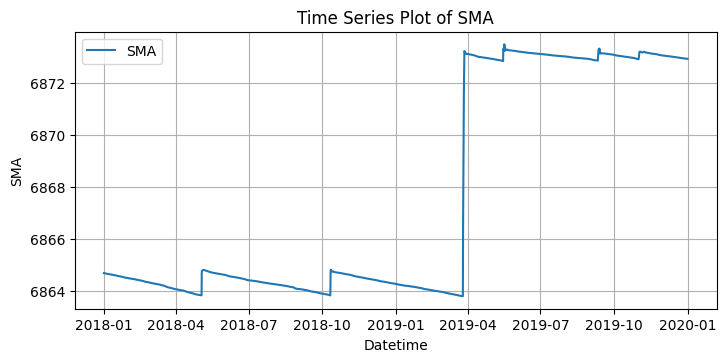

In [6]:
# Visualizations
plt.figure(figsize=(14, 10))
# Time series plot
plt.subplot(3, 2, 1)
plt.plot(df['Datetime'], df['SMA'], label='SMA')
plt.title('Time Series Plot of SMA')
plt.xlabel('Datetime')
plt.ylabel('SMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

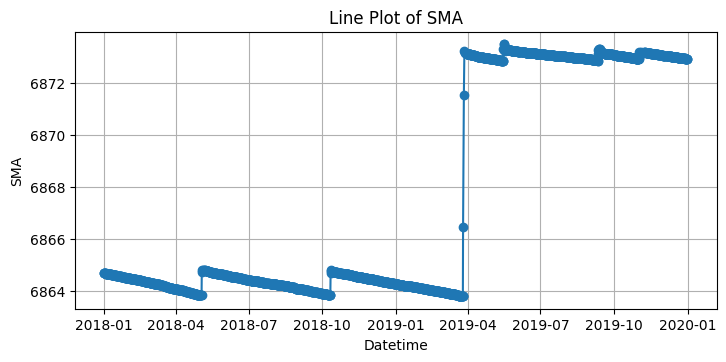

In [7]:
# Visualizations
plt.figure(figsize=(14, 10))
# Line plot with markers
plt.subplot(3, 2, 2)
plt.plot(df['Datetime'], df['SMA'], marker='o', linestyle='-')
plt.title('Line Plot of SMA')
plt.xlabel('Datetime')
plt.ylabel('SMA')
plt.grid(True)
plt.tight_layout()
plt.show()

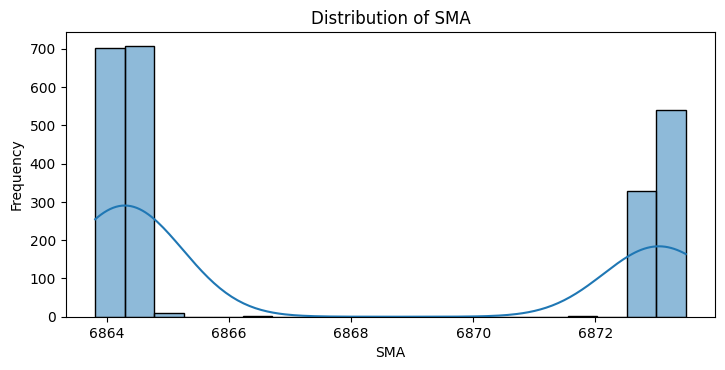

In [8]:
# Visualizations
plt.figure(figsize=(14, 10))
# Distribution of SMA values
plt.subplot(3, 2, 3)
sns.histplot(df['SMA'], bins=20, kde=True)
plt.title('Distribution of SMA')
plt.xlabel('SMA')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

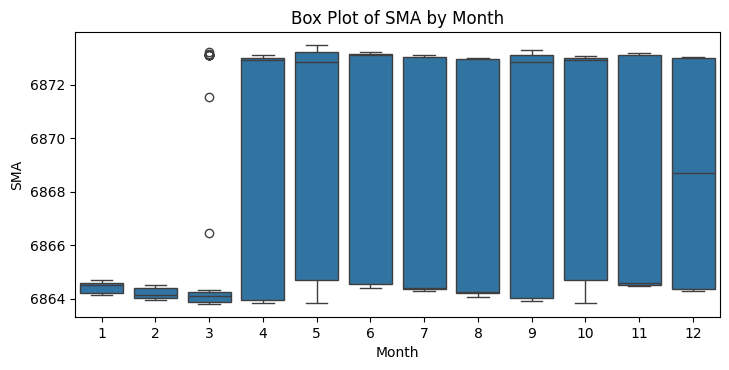

In [9]:
# Visualizations
plt.figure(figsize=(14, 10))
# Box plot of SMA by month
plt.subplot(3, 2, 4)
sns.boxplot(x=df['Month'], y=df['SMA'])
plt.title('Box Plot of SMA by Month')
plt.xlabel('Month')
plt.ylabel('SMA')
plt.tight_layout()
plt.show()

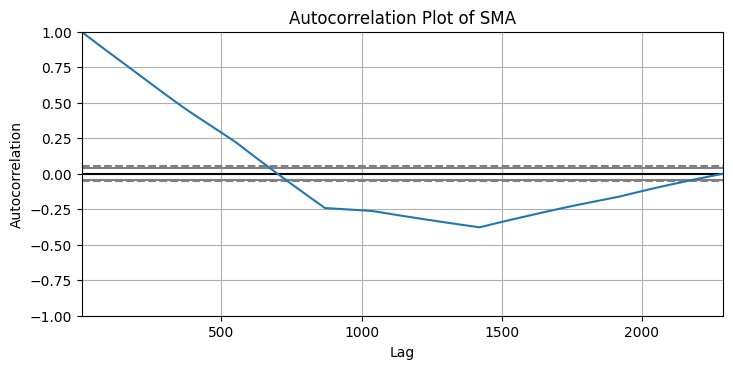

In [10]:
# Visualizations
plt.figure(figsize=(14, 10))
# Autocorrelation plot
plt.subplot(3, 2, 5)
pd.plotting.autocorrelation_plot(df['SMA'])
plt.title('Autocorrelation Plot of SMA')
plt.tight_layout()
plt.show()

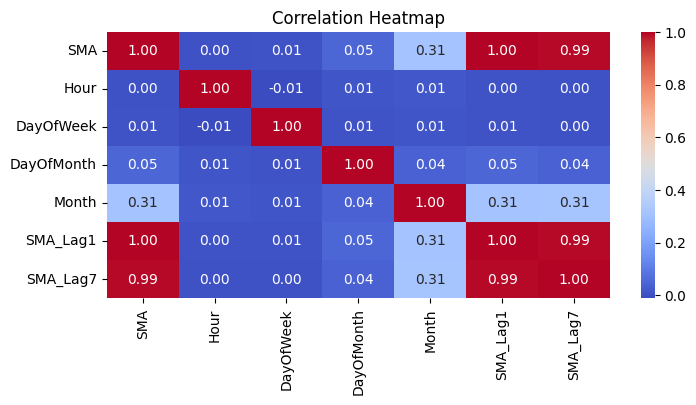

In [11]:
# Visualizations
plt.figure(figsize=(14, 10))
# Heatmap of correlations
plt.subplot(3, 2, 6)
corr = df[['SMA', 'Hour', 'DayOfWeek', 'DayOfMonth', 'Month', 'SMA_Lag1', 'SMA_Lag7']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()